In [46]:
from collections import Counter
from itertools import combinations_with_replacement

import pandas

import matplotlib.pyplot
import seaborn

In [19]:
hash_file = "/home/kubicaj/calc/Haploblock_Clusters_ElixirBH25/out_dir/APOE/individual_hashes_44885589-44935297.tsv"

In [ ]:
# get combinations of variants:
# rs429358 (chr19:45411941) - T>C
# rs7412 (chr19:45412079) - C>T)
cluster2apoe = {}

with open(hash_file) as f:
    line = f.readline()
    if line != "INDIVIDUAL\tHASH\n":
        raise Exception

    for line in f:
        split_line = line.rstrip().split("\t")
        cluster = split_line[1][-22:-2]
        apoe_variants = split_line[1][-2:]
        if cluster in cluster2apoe:
            cluster2apoe[cluster].append(apoe_variants)
        else:
            cluster2apoe[cluster] = [apoe_variants]

In [40]:
alleles = ["e2", "e3", "e4"]
genotypes = ["{}/{}".format(a, b) for a, b in combinations_with_replacement(alleles, 2)]

cluster2geno_counts = {}

for cluster, apoes in cluster2apoe.items():
    counts = Counter(apoes)
    geno_counts = {}

    for a, b in combinations_with_replacement(alleles, 2):
        if a == b:
            geno_counts[f"{a}/{b}"] = counts[a] // 2
        else:
            geno_counts[f"{a}/{b}"] = min(counts[a], counts[b])

    cluster2geno_counts[cluster] = geno_counts

In [43]:
df = pandas.DataFrame.from_dict(cluster2geno_counts, orient="index")
df = df[genotypes]

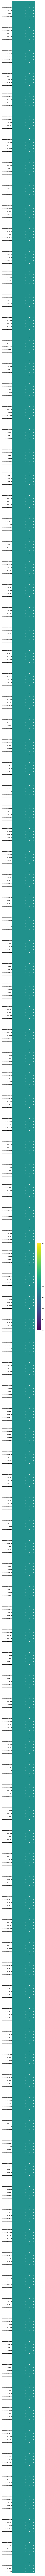

In [47]:
matplotlib.pyplot.figure(figsize=(8, 0.5 * len(df)))
seaborn.heatmap(df, annot=True, fmt="d", cmap="viridis")
matplotlib.pyplot.xlabel("APOE genotype")
matplotlib.pyplot.ylabel("Cluster")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()